In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
datafiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-17*.txt')

In [4]:
datafiles.sort()

In [8]:
datafiles

['../../radiometer/ReadoutApp/Data/2017-11-17_15:07:59calibrator1_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:14:09skydip1_00_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:14:39skydip1_00_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:15:43skydip1_10_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:16:38skydip1_20_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:17:33skydip1_30_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:19:14skydip1_40_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:19:44skydip1_40_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:21:12skydip1_50_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:22:46skydip1_60_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:23:32skydip1return_60_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:24:44skydip1return_50_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017

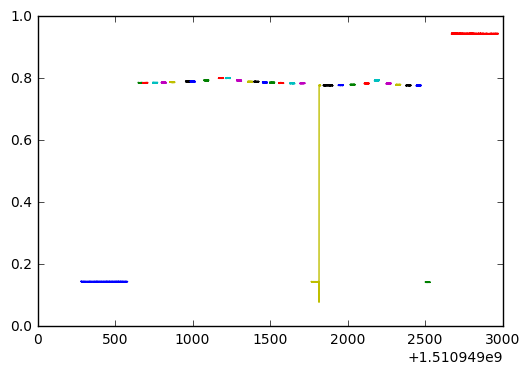

In [6]:
for fn in datafiles:
    x = np.loadtxt(fn)
    time = x[:, 0]
    brightness = x[:, 1]
    temperature = x[:, 2]
    plot(time, brightness)

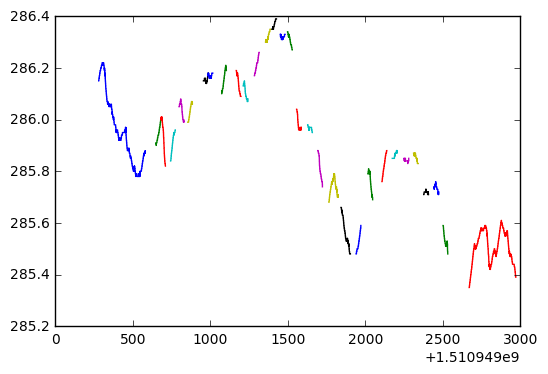

In [7]:
for fn in datafiles:
    x = np.loadtxt(fn)
    time = x[:, 0]
    brightness = x[:, 1]
    temperature = x[:, 2]
    plot(time, temperature)

In [10]:
datafiles

['../../radiometer/ReadoutApp/Data/2017-11-17_15:07:59calibrator1_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:14:09skydip1_00_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:14:39skydip1_00_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:15:43skydip1_10_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:16:38skydip1_20_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:17:33skydip1_30_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:19:14skydip1_40_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:19:44skydip1_40_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:21:12skydip1_50_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:22:46skydip1_60_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:23:32skydip1return_60_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-17_15:24:44skydip1return_50_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017

In [108]:
angles = []
brights = []
temps = []
for fn in datafiles:
    if 'skydip2' in fn and 'Calib' not in fn:
        angle = fn.split('_')[2]
        angles.append(float(angle) * pi / 180.)
        x = np.loadtxt(fn)
        brights.append(np.mean(x[:,1]) * 100)
        temps.append(np.mean(x[:, 2]))
angles = np.array(angles)
brights = np.array(brights)
temps = np.array(temps)

In [109]:
np.mean(temps)

285.74208005985781

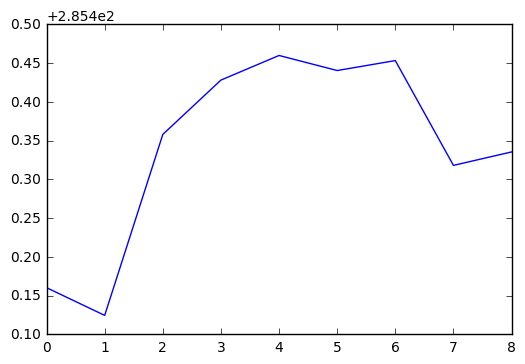

In [110]:
plot(temps)

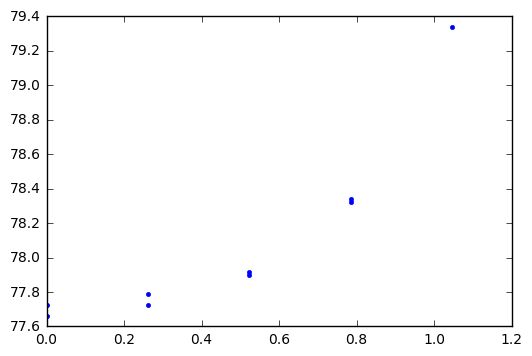

In [30]:
plot(angles, brights, '.')

In [31]:
depth = 1. / np.cos(angles)

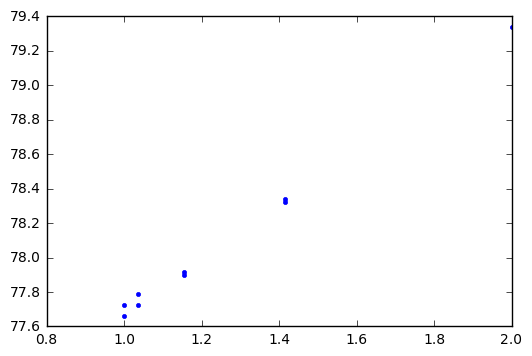

In [63]:
plot(depth, brights, '.')

In [60]:
from scipy.optimize import curve_fit

In [61]:
def line(x, m, b):
    return m * x + b

In [62]:
params, cov = curve_fit(line, depth, brights)

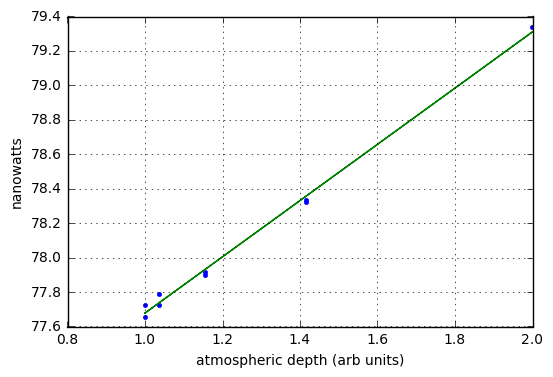

In [67]:
plot(depth, brights, '.')
plot(depth, line(depth, *params))
grid()
xlabel('atmospheric depth (arb units)')
ylabel('nanowatts')

In [65]:
cmb_radio = params[1]

In [66]:
cmb_radio

76.045420521961674

In [106]:
x = np.loadtxt('../../radiometer/ReadoutApp/Data/2017-11-17_15:45:01calib2_Readout.txt')
temps = x[:, 2]
boxdata = x[:, 1] * 1000

In [107]:
np.mean(temps)

285.53138047138043

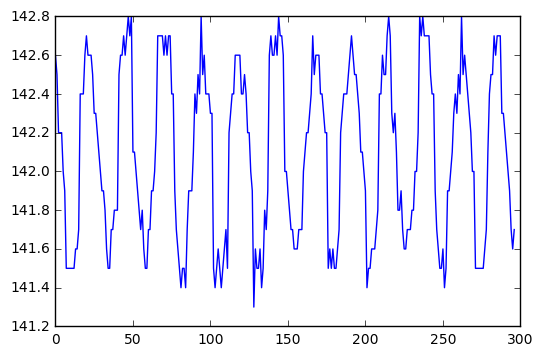

In [76]:
plot(boxdata)

In [78]:
boxcalib = np.mean(boxdata)
boxtemp = np.mean(temps)

In [104]:
x = np.loadtxt('../../radiometer/ReadoutApp/Data/2017-11-17_15:47:50nitro_Readout.txt')
temps = x[:, 2]
nitrodata = x[:, 1]  * 100

In [105]:
np.mean(temps)

285.50895411605939

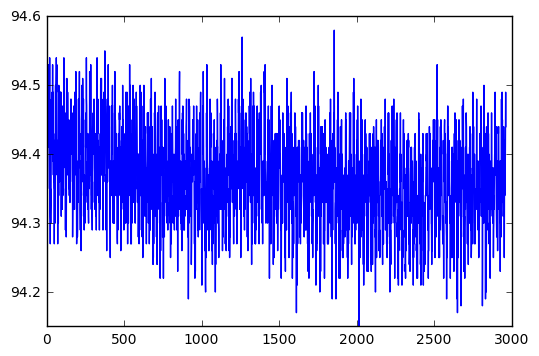

In [86]:
plot(nitrodata)

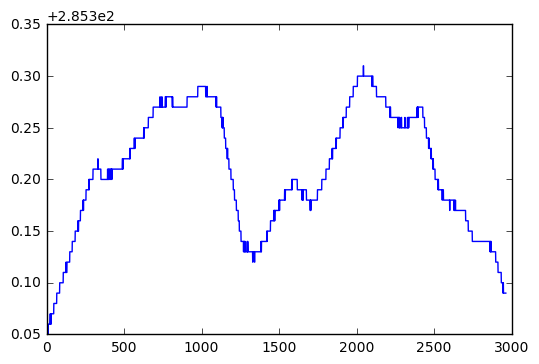

In [87]:
plot(temps)

In [88]:
nitrocalib = np.mean(nitrodata)
nitrotemp = 77.4

In [89]:
nitrocalib

94.364095816464257

In [90]:
boxcalib

142.0973063973064

In [91]:
boxtemp

285.53138047138043

In [92]:
calibtemps = np.array([77.4, 285.53])
calibdata = np.array([94.3641, 142.0973])

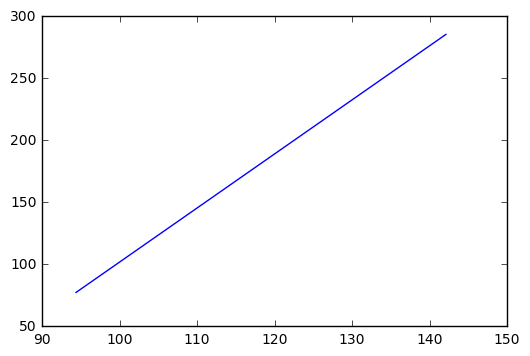

In [94]:
plot(calibdata, calibtemps)

In [96]:
calibdata

array([  94.3641,  142.0973])

In [97]:
calibtemps

array([  77.4 ,  285.53])

In [100]:
params, cov = curve_fit(line, calibdata, calibtemps)

In [102]:
cmbtemp = line(cmb_radio, *params)

In [103]:
cmbtemp

-2.474526739546377